## 【Task2(2天)】设立计算图并自动计算(给代码截图参考)
1. numpy和pytorch实现梯度下降法
2. 设定初始值
3. 求取梯度
4. 在梯度方向上进行参数的更新
5. numpy和pytorch实现线性回归 
6. pytorch实现一个简单的神经网络 


In [1]:
import numpy as np
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt


## numpy实现梯度下降
先获取一些数据
实际上y = 5x1+7x2

In [41]:
%matplotlib inline
np.random.seed(1234)
x1 = np.linspace(2,8,1000)
x2 = np.linspace(-4,19,1000)
x = np.concatenate(([x1],[x2]),axis=0).T

y = np.dot(x,np.array([5,7]).T)

In [60]:
def GD(samples, y, step_size=0.01, max_iter_count=1000):
    '''
    samples:数据
    y 结果
    step_size 学习率
    max_iter 最大迭代次数
    '''
    m, var = samples.shape
    rand_w = np.random.rand(2)
    y = y.flatten()
    eq =5
    loss =1
    iter_count=0
    e = 0
    for i in range(eq):
        train_y = np.dot(samples,rand_w.T)
        loss = 1/m*np.sum(np.sqrt((train_y-y)**2))
        print(loss)
        print(m)
GD(x,y)

71.04752255034855
1000
71.04752255034855
1000
71.04752255034855
1000
71.04752255034855
1000
71.04752255034855
1000


[[ 2.         -4.        ]
 [ 2.00600601 -3.97697698]
 [ 2.01201201 -3.95395395]
 ...
 [ 7.98798799 18.95395395]
 [ 7.99399399 18.97697698]
 [ 8.         19.        ]]
iter_count:  0 the loss: 375.8844832813942
iter_count:  20 the loss: 0.49172234386169283
iter_count:  40 the loss: 0.13364462830322166
iter_count:  60 the loss: 0.03632311384475349
iter_count:  80 the loss: 0.009872215712153652
iter_count:  100 the loss: 0.002683157712841979


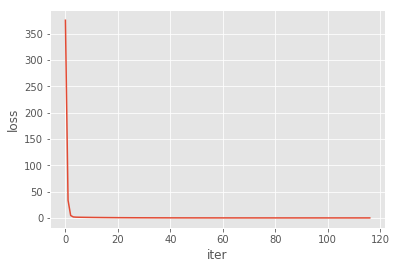

[4.97848157 7.01025981]
90.93144948084907


In [64]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style
def GD(samples, y, step_size=0.01, max_iter_count=1000):
    """
    :param samples: 样本
    :param y: 结果value
    :param step_size: 每一接迭代的步长
    :param max_iter_count: 最大的迭代次数
    :param batch_size: 随机选取的相对于总样本的大小
    :return:
    """
    #确定样本数量以及变量的个数初始化theta值
    m, var = samples.shape
    theta = np.zeros(2)
    y = y.flatten()
    #进入循环内
    print(samples)
    loss = 1
    iter_count = 0
    iter_list=[]
    loss_list=[]
    theta1=[]
    theta2=[]
    #当损失精度大于0.01且迭代此时小于最大迭代次数时，进行
    while loss > 0.001 and iter_count < max_iter_count:
        loss = 0
        #梯度计算
        theta1.append(theta[0])
        theta2.append(theta[1])
        for i in range(m):
            h = np.dot(theta,samples[i].T)   
        #更新theta的值,需要的参量有：步长，梯度
            for j in range(len(theta)):
                theta[j] = theta[j] - step_size*(1/m)*(h - y[i])*samples[i,j]
        #计算总体的损失精度，等于各个样本损失精度之和
        for i in range(m):
            h = np.dot(theta.T, samples[i])
            #每组样本点损失的精度
            every_loss = (1/(var*m))*np.power((h - y[i]), 2)
            loss = loss + every_loss
        if iter_count %20 ==0:
            
            print("iter_count: ", iter_count, "the loss:", loss)
        
        iter_list.append(iter_count)
        loss_list.append(loss)
        
        iter_count += 1
    plt.plot(iter_list,loss_list)
    plt.xlabel("iter")
    plt.ylabel("loss")
    plt.show()
    return theta1,theta2,theta,loss_list
def painter3D(theta1,theta2,loss):
    style.use('ggplot')
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')
    x,y,z = theta1,theta2,loss
    ax1.plot_wireframe(x,y,z, rstride=5, cstride=5)
    ax1.set_xlabel("theta1")
    ax1.set_ylabel("theta2")
    ax1.set_zlabel("loss")
    plt.show()
def predict(x, theta):
    y = np.dot(theta, x.T)
    return y        

samples, y = x,y
theta1,theta2,theta,loss_list = GD(samples, y)
print(theta)  # 会很接近[5, 7] 
# painter3D(theta1,theta2,loss_list)
predict_y = predict(theta, [7,8])
print(predict_y)


In [54]:
a =np.random.rand(2)
a

array([0.37025075, 0.56119619])

## pytorch实现线性回归
一个简单的神经网络

In [4]:
# 搞一点数据过来
%matplotlib inline
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(2)+0.2*torch.rand(x.size())

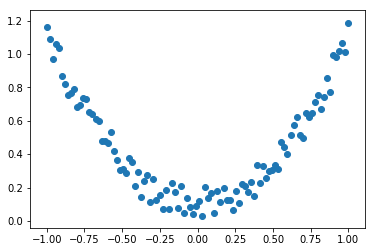

In [5]:
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

In [6]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x
    
net = Net(1,10,1)
net

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
接下来设定loss和optimizer， 在这里使用随机梯度下降SGD。 loss使用均方差误差

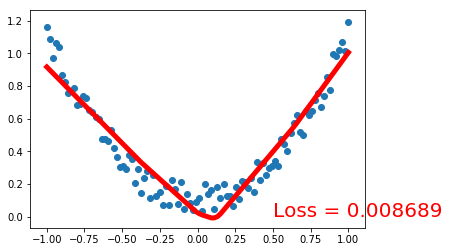

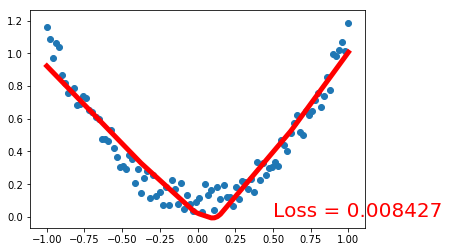

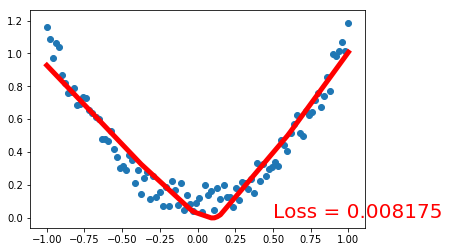

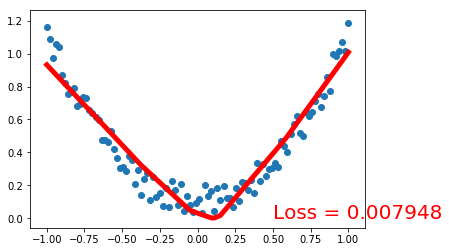

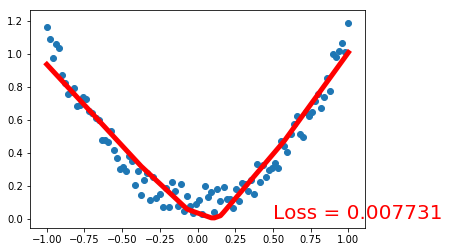

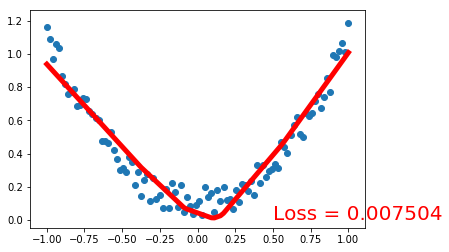

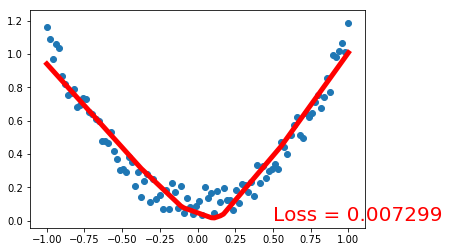

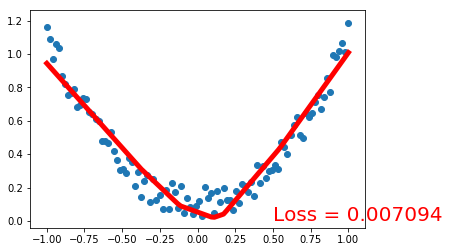

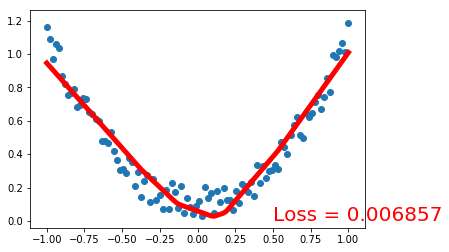

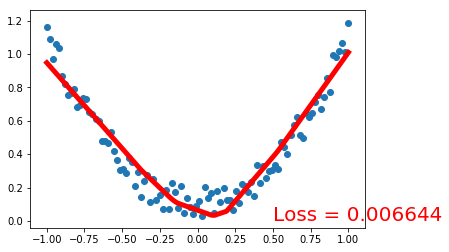

In [8]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.3)
loss_func = torch.nn.MSELoss()

for t in range(100):
    prediction = net(x)
    
    loss = loss_func(prediction,y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t%10 ==0 :
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
        plt.text(0.5,0,'Loss = %4f'% loss.data.numpy(),fontdict={'size':20,'color':'red'})
        plt.pause(0.1)
    plt.show()